In [6]:
import numpy as np
import pandas as pd
import re, string, nltk
from pathlib import Path
from numpy import genfromtxt

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
path = Path("C:/Users/user/Google Drive/Els_meus_documents (1)/projectes/CompetitiveIntelligence/WRI/Notebooks/Data/")
filename = "sentences.npy"
file = path / filename
with open(file, 'rb') as f:
    sentences = np.load(f)

In [342]:
# Regular expression to clear html tags (here is basically to remove the page tags)
cleanr = re.compile(r'<.*?>')
# Te function to clear html tags
def clean_html_tags(string):
  return cleanr.sub('', string)

# Regular expression to clear punctuation from a string
clean_punct = re.compile('[%s]' % re.escape(string.punctuation))
# Regular expression to clear words that introduce unnecessary variability to headings. Some regex still not work 100% we need
# to improve them.
clean_capitulo = re.compile(r'(apartado\s\S*)|(apartado\s)|(^art\b\.* \d*\W*\w*\W*\d*)|(^artículo\b\.* \d*\W*\d*)|(^art\b\.* \d*\W*\d*)|(capítulo\s\S*)|(capitulo\S*)|(capitulo\s\S*)|(capituló\s\S*)|(capitulos\s\S*)|(capituo\s\S*)|(categoria\b)|(categoría\b)|(subcategoria\b)|(subcategoría\b)|(titulo\s\S*)|(título\s\S*)|(^\w{1}\W+)|(^\w{1}\b)')
# Function to remove 1. unwanted words; 2. punctuation; 3. leading white spaces
def clean_headings(string):
    string = string.lower()
    string = string.rstrip().lstrip()
    clean_string = clean_capitulo.sub('', string).rstrip().lstrip()
    if clean_string != "":
        return clean_string
    else:
        pass

decimal_point = re.compile(r'\d+.\d+')
def preserve__point(string):
    return decimal_point.sub('\#', string)
    
    

def analyze_length(sentence):
    length = len(sentence)
    if length in sentences_freq and length > min_cut and length < max_cut:
        sentences_freq[len(sentence)] = sentences_freq[len(sentence)] + 1
        if length > print_length_min and length < print_length_max:
            print(sentence, "\n")
    elif length > min_cut and length < max_cut:
        sentences_freq[len(sentence)] = 1
        if length > print_length_min and length < print_length_max:
            print(sentence, "\n")
    return sentences_freq

In [19]:
from nltk.tokenize import sent_tokenize
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
string_test = "art.71: Del ordenamiento jurídico mexicano? Se pueden concretar 23.34 dólares"
clean = re.compile(r'(^art\b\.* \d*\W*\w*\W*\d*)|(^art\b\.* \d*\W*\d*)')
sent_tokenize(string_test, language='spanish')
# print(clean.sub('success!', string_test).rstrip().lstrip())

['art.71: Del ordenamiento jurídico mexicano?',
 'Se pueden concretar 23.34 dólares']

In [344]:
sentences_freq = {}
new_sentences = []
min_cut = 0
max_cut = 20
print_length_min = 9
print_length_max = 11
init = 0
clean = 0
split = 0
split_clean = 0
sentences_test = [".No n'hi havia gens", "n'hi havia una mica. Art.1.2 però no gaire."]

for item in sentences:
#     print(i)
    init += 1
    item = clean_html_tags(item)
    item = clean_headings(item)
    if item == None:
        pass
    else:
        clean += 1
        item = preserve_decimal_point(item)
        sent = item.split(".")
        for sentence in sent:
            split += 1
            if sentence != "":
                split_clean += 1
#                 print(sentence.rstrip().lstrip())
                analyze_length(sentence)

que el art 

que el art 

que el art 

manantial: 

decreto no 

que el art 

particular 

procedente 

objeto art 

decreto no 

decreto no 

acuerdo no 

de siembra 

de la poda 

y residuos 

en trámite 

supletoria 

decreto no 

densidades 

densidades 

 de altura 

 0 o o ti] 

decreto no 

decreto no 

protección 

: religión 

: religión 

: religión 

zona verde 

h rar ¡ pe 

decreto no 

decreto no 

decreto no 

decreto no 

muy graves 

prohibido: 

decreto no 

decreto no 

inspección 

objeto art 

- derogado 

decreto no 

manantial: 

decreto no 

decreto no 

decreto no 

ecosistema 

permitidas 

prohibidas 

cytinaceae 

 divergens 

 angustata 

en peligro 

en peligro 

en peligro 

en peligro 

en peligro 

 linaresii 

en peligro 

en peligro 

annonaceae 

chichipate 

palo negro 

granadillo 

en peligro 

en peligro 

en peligro 

en peligro 

en peligro 

en peligro 

en peligro 

en peligro 

en peligro 

de la poda 

y residuos 

para talar 

requisitos 


In [325]:
print(split)
print(split_clean)

102799
71917


In [333]:
df = pd.DataFrame.from_dict(sentences_freq, orient='index')
df.reset_index(inplace=True)
df = df.rename(columns = {'index' : 'Sentence length', 0 : 'freq'})
df = df.sort_values(by=['Sentence length'])
# df = df.sort_values(by=['freq'], ascending = False)

In [334]:
print(df.head())

   Sentence length  freq
6                1   645
0                2  1962
1                3  1470
2                4  1233
5                5   333


In [327]:
# print(df.head())
# print(df.describe().round(0))
print(df['freq'].sum())
array = df.to_numpy()
# print(array[0:5])
med = df['freq'].sum()
suma = 0
for item in array:
    suma = suma + item[1]
    if suma > med/2:
        print("The median of the frequency distrbution of the sentence length is", item[0])
        break

71917
The median of the frequency distrbution of the sentence length is 101


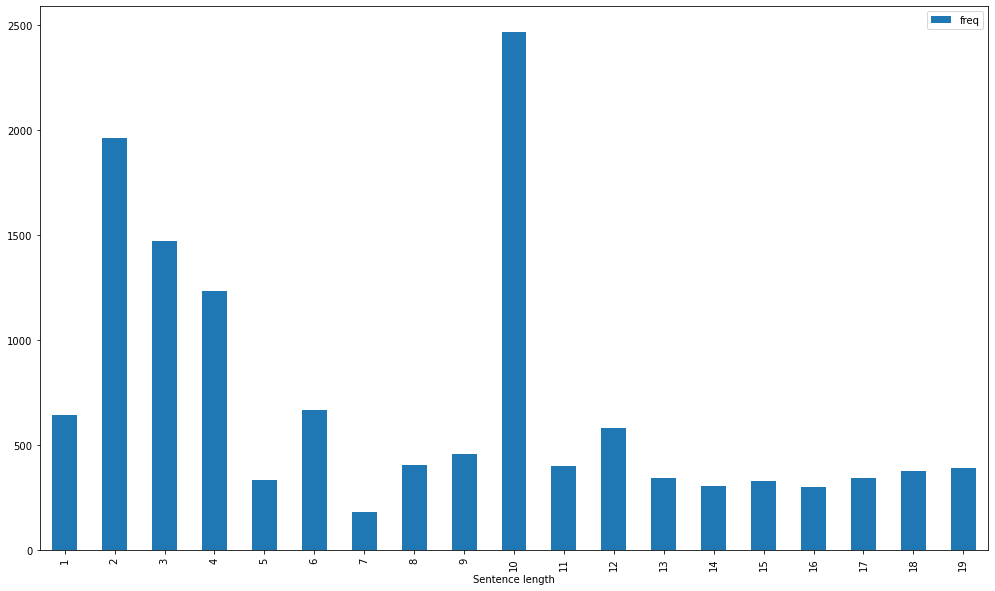

In [336]:
ax = df.plot.bar(x='Sentence length', y='freq', rot=90, figsize = (17, 10) )
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 1) != 0:
        t.set_visible(False)

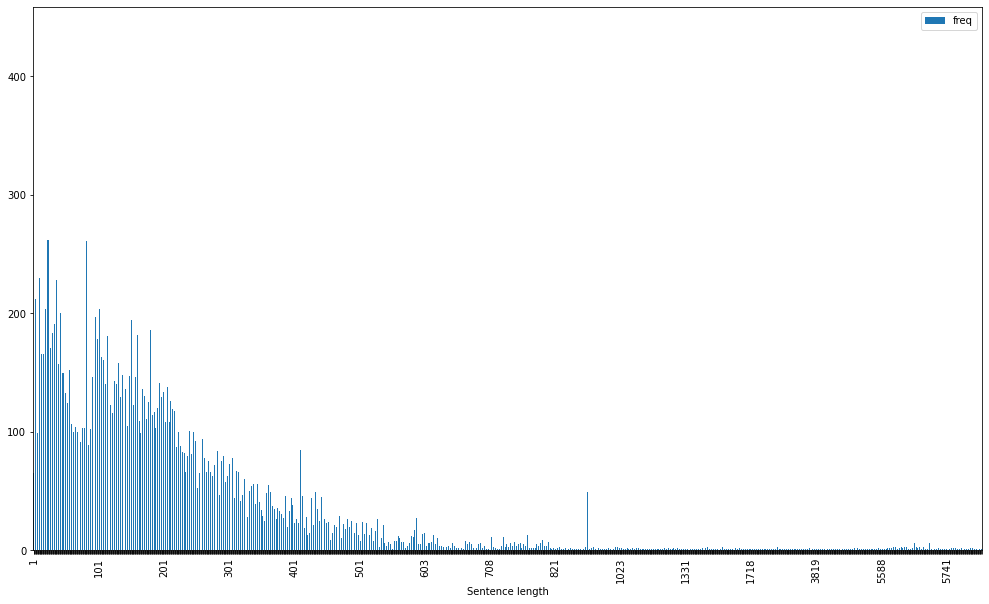

In [296]:
ax = df.plot.bar(x='Sentence length', y='freq', rot=90, figsize = (17, 10) )
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 100) != 0:
        t.set_visible(False)

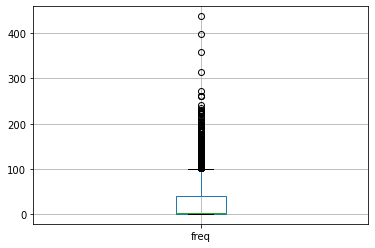

In [286]:
boxplot = df.boxplot(column = ['freq'])